In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image as im
#from matplotlib.image import imread
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
def label_img(pic):
    if pic.startswith("non"): return [0, 1]
    else : return [1, 0]

In [3]:
data_folder = r"D:\AI_ML_DL\Omdena_Projects\SA\Mahrukh\CompleteData" + "/"
photos, labels = list(), list()

folder = listdir(data_folder)

for eachpic in folder: 
    label = label_img(eachpic)
    file = data_folder + eachpic
    image = load_img(file)
    image = img_to_array(image) / 255
    photos.append([image, label])
    

from random import shuffle

# shuffling of the training data to preserve the random state of our data
shuffle(photos)

# saving our trained data for further uses if required
np.save('photos.npy', photos)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [4]:
train = photos[:2271]
test = photos[2271:]
print(len(train))
print(len(test))

2271
600


In [5]:
train_data = np.array([i[0] for i in train])
#x_train = np.array([i[0] for i in train]).reshape(-1, 64, 64, 1)
train_label = np.array([i[1] for i in train])
#x_test = np.array([i[0] for i in test]).reshape(-1, 64, 64, 1)
test_data = np.array([i[0] for i in test])
test_label = np.array([i[1] for i in test])
print(train_data.shape,  "\n",train_label.shape, "\n",test_data.shape, "\n",test_label.shape)

(2271, 128, 128, 3) 
 (2271, 2) 
 (600, 128, 128, 3) 
 (600, 2)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split 

train_x, val_x, train_y, val_y = train_test_split(train_data, train_label, test_size = 0.2)
batch_size = 32
num_classes = 2
epochs = 30

In [18]:
#del model
from tensorflow.keras import regularizers


In [7]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=train_data.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation("sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 activation (Activation)     (None, 128, 128, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 126, 126, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                        

In [10]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, mode="auto",
                              patience=5, min_lr=0.001)

In [11]:
# Training the Model
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [12]:
history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, verbose = 1, callbacks=[reduce_lr],
                    validation_data = (val_x, val_y))

Epoch 1/30
57/57 [==============================] - 205s 4s/step - loss: 0.6892 - accuracy: 0.5655 - val_loss: 0.6905 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 2/30
57/57 [==============================] - 179s 3s/step - loss: 0.6888 - accuracy: 0.5710 - val_loss: 0.6902 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 3/30
57/57 [==============================] - 173s 3s/step - loss: 0.6847 - accuracy: 0.5710 - val_loss: 0.6900 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 4/30
57/57 [==============================] - 176s 3s/step - loss: 0.6852 - accuracy: 0.5710 - val_loss: 0.6907 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 5/30
57/57 [==============================] - 168s 3s/step - loss: 0.6835 - accuracy: 0.5710 - val_loss: 0.6909 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 6/30
57/57 [==============================] - 172s 3s/step - loss: 0.6836 - accuracy: 0.5710 - val_loss: 0.6902 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 7/30
57/57 [==============================] - 185s 3s/step - loss: 0.6

In [13]:
df_history = pd.DataFrame(history.history) 
df_history

,loss,accuracy,val_loss,val_accuracy,lr
0,0.689218,0.565529,0.690481,0.540659,0.001
1,0.688850,0.571035,0.690171,0.540659,0.001
2,0.684715,0.571035,0.690008,0.540659,0.001
3,0.685237,0.571035,0.690661,0.540659,0.001
4,0.683547,0.571035,0.690874,0.540659,0.001
...,...,...,...,...,...
25,0.623668,0.658040,0.701825,0.531868,0.001
26,0.616292,0.648678,0.717406,0.523077,0.001
27,0.593876,0.673458,0.722315,0.529670,0.001
28,0.592359,0.686123,0.737249,0.527473,0.001


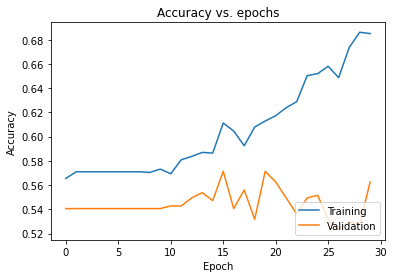

In [14]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

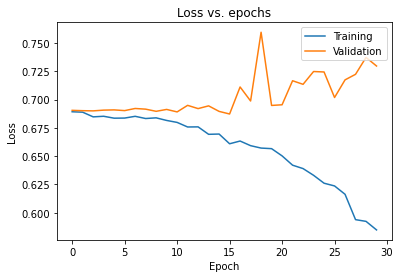

In [15]:
#Run this cell to plot the epoch vs loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [16]:
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.677
Test accuracy: 60.83%
